# Численное дифференцирование

Пусть функция $f(x)$ дана нам в виде "черного ящика" -- то есть мы умеем только вычислять её значения в заданных точках. Необходимо получить значение её производной в некоторой точке $x_0$. Так как мы не знаем явный аналитический вид $f(x)$, мы не можем получить аналитическое выражение для её производной.

Вспомним определение производной функции:

\begin{equation}
f'(x)=\lim_{h \to 0} \frac{f(x+h)-f(x)}{h}.
\end{equation}

Можно надеяться получить достаточно точное значение производной, если заменить предел на отношение с достаточно маленьким $h$. То есть

\begin{equation}
f'(x)=\lim_{h \to 0} \frac{f(x+h)-f(x)}{h} \approx \frac{f(x+h)-f(x)}{h}.
\end{equation}

Интуитивно понятно, что чем меньшее значение $h$ мы возьмем, тем меньшую погрешность вычисления производной получим. Можно оценить погрешность вычисления прооизводной аналитически при помощи разложения в ряд Тейлора. Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:

\begin{equation}
f(x + h) = f(x) + f'(x)h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x, x + h].
\end{equation}

Подставим это разложение в выражения для ошибки вычисления производной:

\begin{equation}
\left|f'(x) - \frac{f(x + h) - f(x)}{h}\right| = \frac{|f''(\xi)|h}{2}.
\end{equation}

Тогда, если известно, что $|f''(\xi)| \leq M_2$, ошибку метода можно оценить как

\begin{equation}
\left|f'(x) - \frac{f(x + h) - f(x)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}.
\end{equation}

Видно, что ошибка метода стремится к нулю при  $h \to 0$ , причем  $\varepsilon_\text{method}=O(h)$ .

Говорят, что данный метод имеет первый порядок, так как его ошибка стремится к нулю как первая степень величины  $h$, которую называют шагом дифференцирования.

Полученная формула для приближенного вычисления производной является не единственной, можем в качестве примера рассмотреть еще один вариант - так называемую формулу **центральных разностей**:

\begin{equation}
f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.
\end{equation}

Пользуясь разложением в ряд Тейлора, можно показать, что для этой формулы ошибка метода оценивается как

\begin{equation}
\left|f'(x) - \frac{f(x + h) - f(x - h)}{2h}\right| \leqslant  \varepsilon_\text{method} = \frac{M_3 h^2}{6}, \qquad |f'''(\xi)| \leqslant M_3.
\end{equation}

То есть данный метод имеет **второй порядок**, так как $\varepsilon_\text{method} = O(h^2)$.

**Контрольный вопрос**
Почему считается, что более высокие порядки аппроксимации лучше?

Перейдем к программной реализации этих методов. В качестве тестовой задачи будем вычислять производную для функции $\sin{x}$ в точке $x=\pi/4$.

Определим функцию для приближенного вычисления производной в точке.

In [ ]:
def diff1(f, x, h):
    return (f(x + h) - f(x)) / h

Будем вычислять приближенное значение производной при помощи функции $\textrm{diff1}$, используя различный шаг дифференцирования $\textrm{h}$.

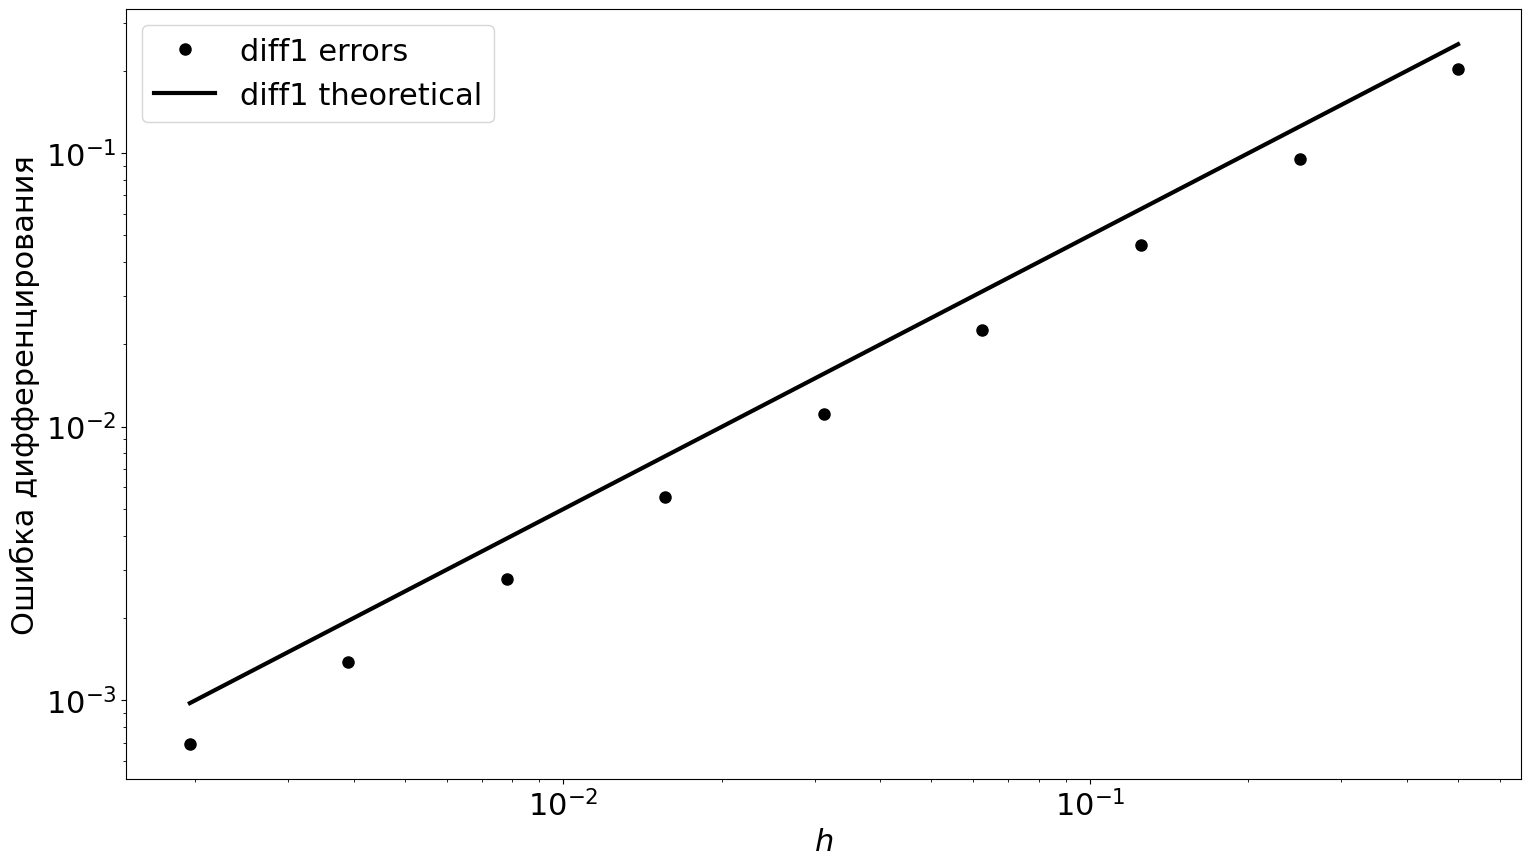

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# массив, содержащий различные шаги дифференцирования 2^(-1), 2^(-2), ...
h_array = 2.0**(-np.arange(1, 10, 1))

errors_diff1 = []
errors_diff1_theoretical = []

# Для теоретической оценки погрешности требуется максимум зачения |f'(x)|. |(sin(x))'|=|cos(x)|<=1.
M2 = 1

# Вычисляем значение ошибки и теоретическую оценку ошибки при различных шагах дифференцирования
for h in h_array:
    errors_diff1.append(abs(diff1(np.sin, np.pi/4, h) - np.cos(np.pi/4)))
    errors_diff1_theoretical.append(M2 * h / 2)

plt.figure(figsize=(18, 10))

# Рисуем в логорифмической шкале
plt.loglog(h_array, errors_diff1, 'k.', ms=16, label='diff1 errors')
plt.loglog(h_array,errors_diff1_theoretical, 'k-', label='diff1 theoretical', lw=3)

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()


### Упражнение 1

Реализуйте функцию, вычисляющую приближенное значение производной по формуле центральных разностей. Постройке график ошибки метода и график теоретической оценки ошибки метода при вычислении производной функции $f(x)=\frac{1}{x}$ в точке $x=2$.

In [ ]:
def diff2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

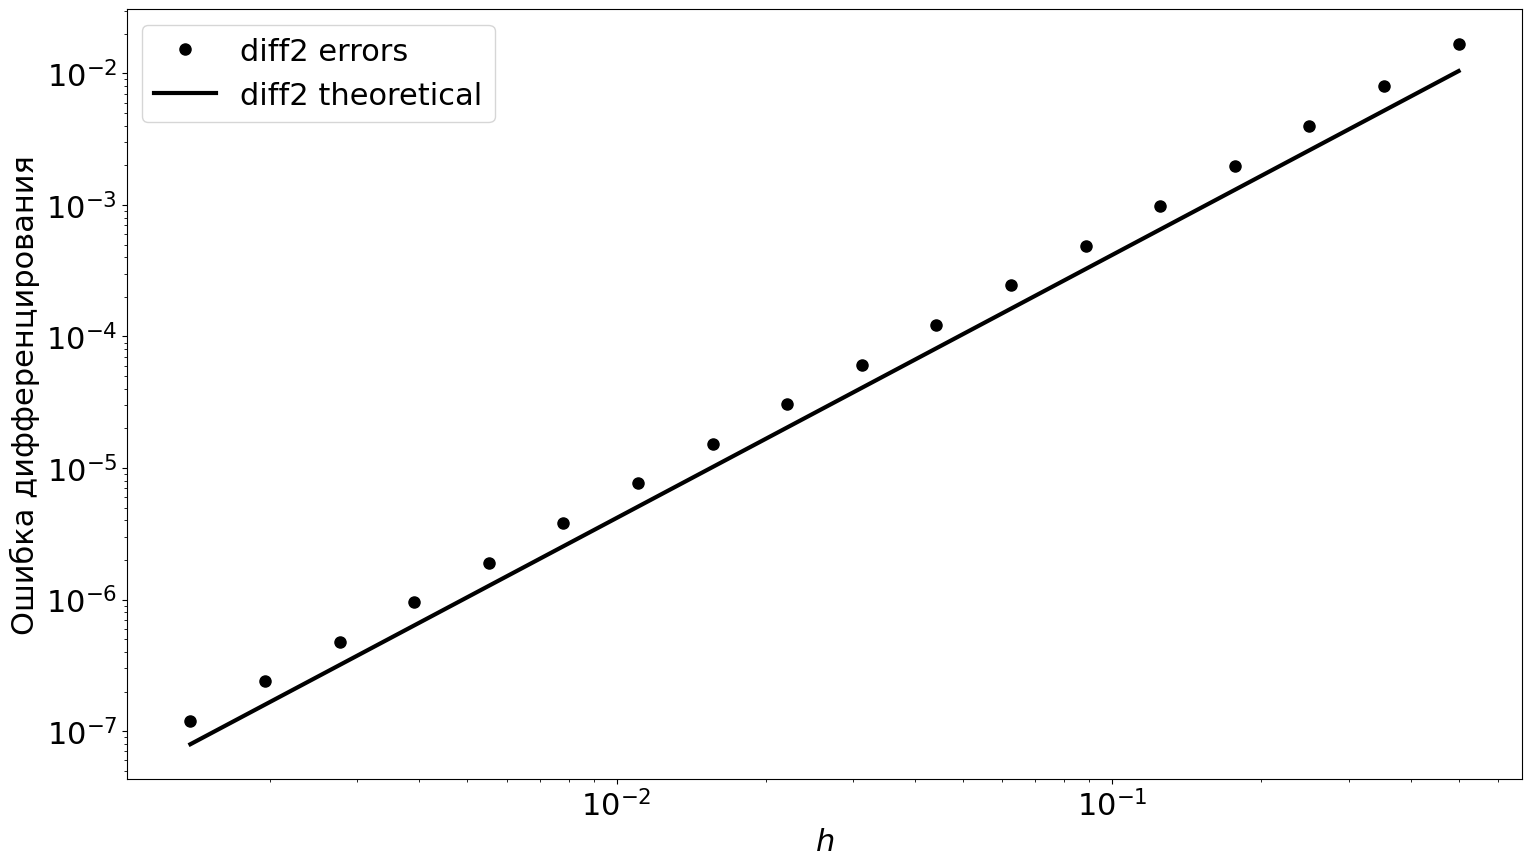

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# массив, содержащий различные шаги дифференцирования 2^(-1), 2^(-2), ...
h_array = 2.0**(-np.arange(1, 10, 0.5))

errors_diff2 = []
errors_diff2_theoretical = []

M3 = 1/4

def f(x):
  return 1/x
# Вычисляем значение ошибки и теоретическую оценку ошибки при различных шагах дифференцирования h
for h in h_array:
    errors_diff2.append( abs(diff2(f,2,h)+1/4) )
    errors_diff2_theoretical.append((M3*h*h)/6)

plt.figure(figsize=(18, 10))

plt.loglog(h_array, errors_diff2, 'k.', ms=16, label='diff2 errors')
plt.loglog(h_array,errors_diff2_theoretical, 'k-', label='diff2 theoretical', lw=3)

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()

# Вычисление производной на отрезке

На практике часто требуется вычислять значения производной не в одной точке, а на отрезке $x \in [a, b]$. Чисто физически мы не можем применить формулу приближенного вычисления производной в каждой точке отрезка. Поэтому будем вычислять значение производной функции только в конечном наборе точек $x_0,\ x_1,\ ...,\ x_n \in [a, b]$. Совокупность этих точек, покрывающих отрезок, будем называть **сеткой**, а точки с координатами $x_0,\ x_1,\ ...,\ x_n \in [a, b]$ - **узлами сетки**.

Самый простой вид сетки - **равномерная**. У такой сетки расстояние между соседними узлами одинаково:

\begin{equation}
h = (b-a)/n, \\
\quad x_i = a + i h, \ i = 0,\dots,n.
\end{equation}


![grid](images/grid.png)

Примеры сеток в более сложных областях

<table><tr>
<td> <img src="images/rabbit_grid.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="images/car_grid.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="images/sphere_grid.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

После введения на отрезке сетки мы можем перейти к приближенному вычислению производных в узлах сетки.

Для обозначения значений функций в узлах сетки будем использовать $f(x_i)=f_i$. Тогда формулы численного дифференцирования в узлах сетки можно записать следующим образом:

\begin{equation}
f'_i \approx \frac{f_{i+1}-f_i}{h}, \\
f'_i \approx \frac{f_{i+1}-f_{i-1}}{2h}.
\end{equation}

Теперь для вычислений мы используем только значения функции в узлах сетки, и значения производных мы получаем только в узлах сетки. Таким образом, мы перешли от функций непрерывного аргумента к **сеточным функциям**.

![grid_functions](images/grid_functions.png)

Рассмотрим тестовую задачу. Требуется приближенно вычислить производную функции $f(x)=\sin x$ на периодическом отрезке $x \in [0, 2\pi)$.

Реализуем функцию для приближенного вычисления производной на отрезке.

In [ ]:
def diff1_segment(f, h, n):
    diff_f = np.zeros(n+1)
    for i in range(n):
        diff_f[i] = (f[i+1]-f[i])/h
    diff_f[n] = diff_f[0] # т.к. отрезок периодический x0 = xn, f'_0 = f'_n
    return diff_f


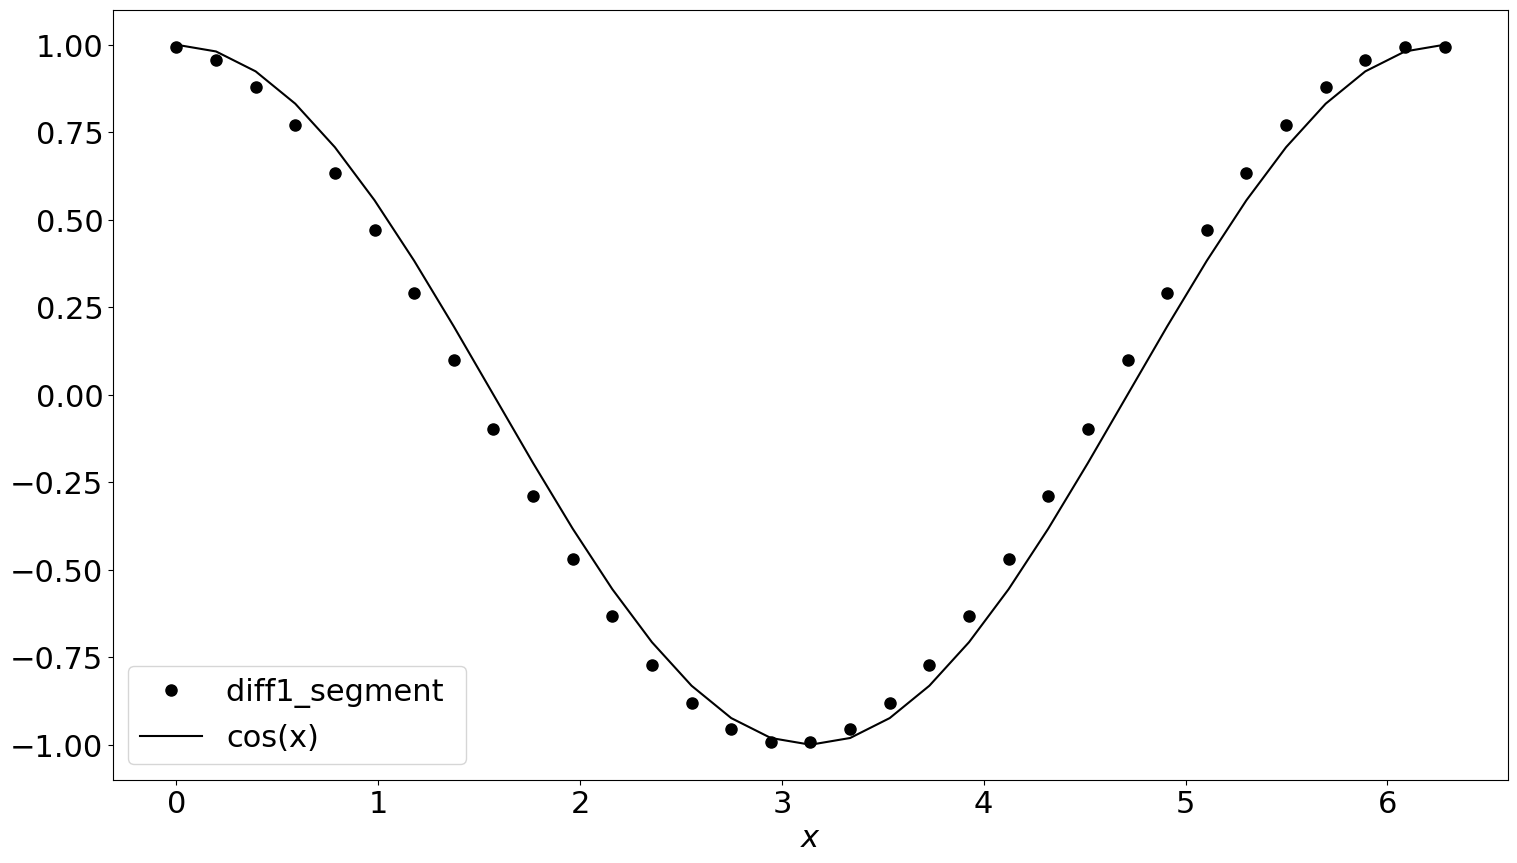

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# Параметры отрезка
a = 0.0
b = 2 * np.pi

# Параметры сетки
n = 32
h = (b - a) / n

# Узлы сетки. Т.к. отрезок периодический x_0 = x_n.
x = a + h * np.arange(0, n+1)

# Значения функции в узлах сетки
f = np.sin(x)

diff_f = diff1_segment(f, h, n)

plt.figure(figsize=(18, 10))

plt.plot(x, diff_f, 'k.', ms=16, label='diff1_segment ')
plt.plot(x, np.cos(x), 'k-', ms=16, label='cos(x)')
plt.xlabel('$x$')
plt.legend()

plt.show()

### Упражнение 2

Релизуйте функцию для приближенного вычисления производной на отрезке $x \in [-\pi, \pi)$ функции $f(x) = sin^2x$ при помощи формулы центральной разности. Постройте графики приближенного и точного значений производной.

In [ ]:
def diff2_segment(f, h, n):
    diff_f = np.zeros(n+1)
    for i in range(1,n):
      diff_f[i] = (f[i+1]-f[i-1])/(2*h)
    return diff_f

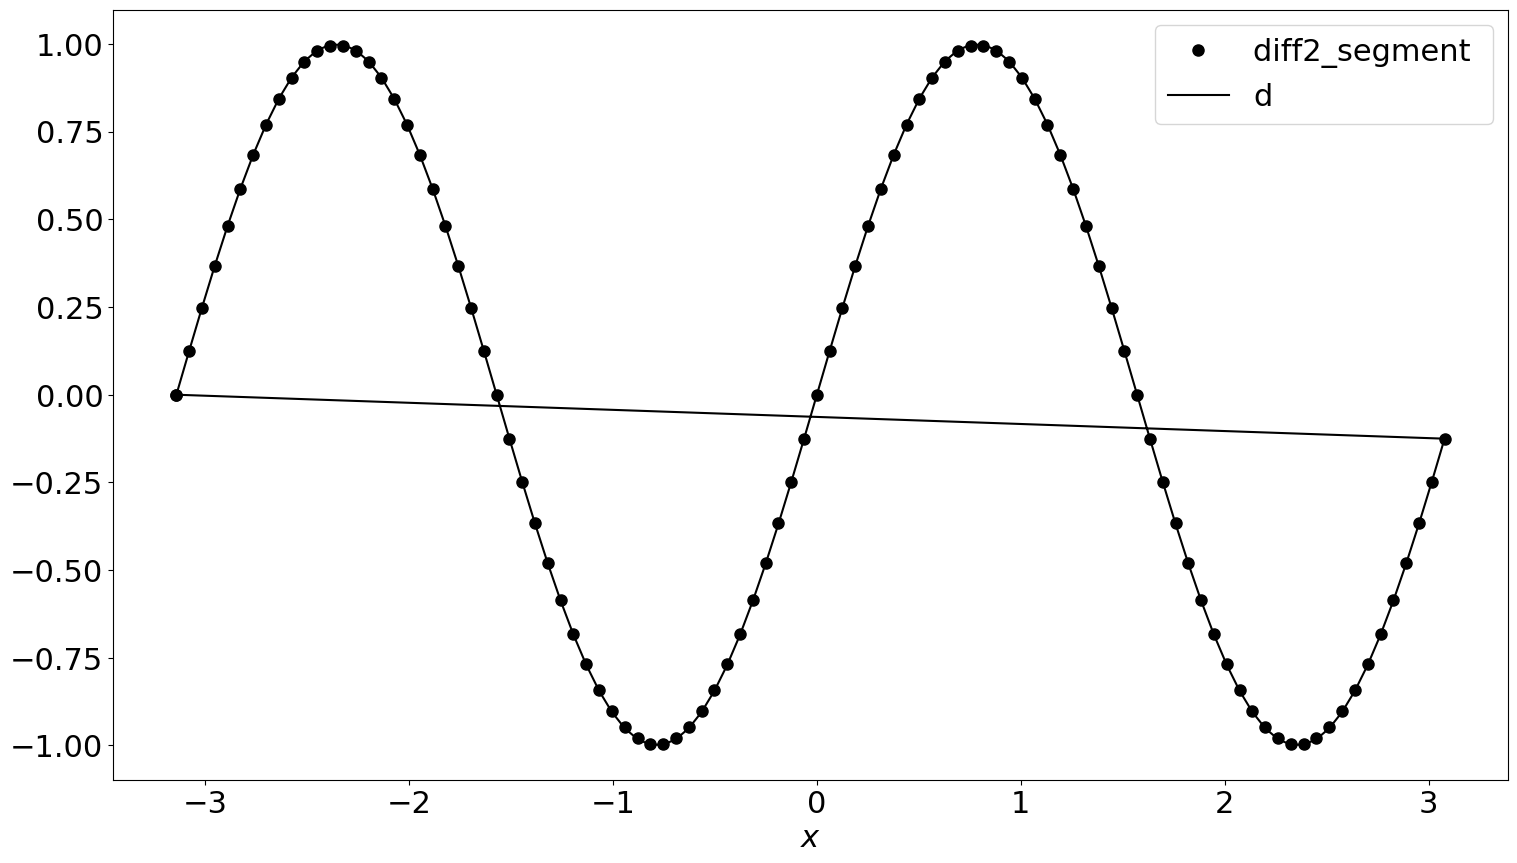

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# Параметры отрезка
a = -np.pi
b = np.pi

# Параметры сетки
n = 100
h = (b-a)/n

# Узлы сетки. Т.к. отрезок периодический x_0 = x_n.
x = [a+i*h for i in range(n)]
x.append(a)
# Значения функции в узлах сетки
f = np.sin(x)*np.sin(x)
diff_f = diff2_segment(f, h, n)
ans = np.sin(x)*np.cos(x)*2
plt.figure(figsize=(18, 10))

plt.plot(x, diff_f, 'k.', ms=16, label='diff2_segment ')
plt.plot(x,  ans, 'k-', ms=16, label= 'd')
plt.xlabel('$x$')
plt.legend()

plt.show()

### Нормы ошибки
Пусть $\varepsilon_i$ - ошибка вычисления производной в $i$-ом узле сетки, а на отрезке $n$ точек.

Ошибку на всем отрезке можно удобно характеризовать лишь несколькими числами - нормами ошибки. Ведем норму
\begin{equation}
l_q = \left(\frac{1}{n}\sum_{i=1}^n \lvert\varepsilon_i\rvert^q\right)^{(1/q)}.
\end{equation}

Обычно смотрят вторую $l_2$ и "бесконечную" (максимальную) норму $l_\infty$. Про последнюю можно показать
\begin{equation}
l_\infty = \max \left\lvert\varepsilon_i \right\rvert, \quad {i\in[1,n]}.
\end{equation}

### Упражнение 3
а) Вычислите $l_2$ и $l_\infty$ нормы ошибки аппроксимации производной на отрезке для "левой" и центральной разностей для разного числа точек на отрезке.

б) Постройте график зависимости норм ошибки от шага сетки $h$ в логарифмическом масштабе. Получаются ли у вас (почти) прямые линии?

в) Постройте кривую "теоретической" ошибки $\varepsilon = C h^p$ так, она должна быть почти параллельна кривой реальной ошибки, константу $C$ можно использовать, чтобы удобно расположить графики рядом. Какое нужно ставить $p$ для левой разности и центральной разности?  

# Формулы вычисления производных более высокого порядка точности
Формулы вычисления производной с лучшей точностью можно получить взяв больше точек в шаблоне. Будем вычислять производную функции f в $i$-ой точке сетки $x_i = i h$ по пяти точкам $x_{i-2}=x_i-2h$, $x_{i-1} = x_i-h$, $x_i$, $x_{i+1}=x_i+h$, $x_{i+2}=x_i+2h$. Предположим, что $f$ в рядом с $x_i$ можно записать в виде ряда Тейлора:
\begin{equation}
f(x) = f(x_i)+f'(x_i)(x-x_i)+\frac{1}{2}f''(x_i)(x-x_i)^2+
\frac{1}{6}f'''(x_i)(x-x_i)^3+\frac{1}{24}f^{(4)}(x_i)(x-x_i)^4+\frac{1}{120}f^{(5)}(x_i)(x-x_i)^5
\end{equation}

### Упражнение 4
Подберите коэффициенты $a,b,c,d,e$ так, что бы
\begin{equation}
\frac{af(x_{i-2})+bf(x_{i-1})+cf(x_{i})+df(x_{i+1})+ef(x_{i+2})}{h} = f'(x_i)+Ch^4,
\end{equation}
(используйте разложение $f$ в ряд Тейлора).

В результате получится центральная формула для вычисления первой производной четвертого порядка точности.

## Упражнение 5
а) Повторите **упражнение 3** для полученной формулы 4-го порядка.

б) Получилось ли, что ошибка убывает как $h^4$?

в) Что точнее, центральная разность второго порядка или четвертого?

г) Возьмите тестовую функцию $f(x)=(1+\cos(2x))$, $x\in[-\pi/2,\pi/2]$, $f(x) = 0$, $x\in [-\pi,-\pi/2)$, $x\in(\pi/2,\pi]$. Какие порядки точности получаются для этой функции в $l_2$ и $l_\infty$ нормах? Какая формула точнее для этой функции?

# Спектр

У оператора производной есть собственные функции и собственные числа
\begin{equation}
\frac{\partial}{\partial x}\exp\{i k x\} = i k \exp\{i k x\},
\end{equation}
где $i$ - мнимая единица.

Функция $\exp\{i k x\}$ будет собственной функцией и для конечно-разностных формул. Например, для центральной разности второго порядка
\begin{equation}
\frac{\exp\{ik(x+h)\}-\exp\{ik(x-h)\}}{2h} =\frac{\exp\{ikh\}-\exp\{-ikh\}}{2h}\exp\{ikx\} =
i \sin(kh)\exp\{ikx\}.
\end{equation}

**Обратите внимание.** Собственные числа для конечно-разностных формул имеют смысл только для $k\in[0,\pi/h]$. Почему так?

### Упражнение 6
a) Вычислите собственные числа для "левой" разности и центральной разности 4-го порядка (можно не выводит аналитически, а применить нужную формулу к $\exp{ikx}$ в точке $x=0$ или любой другой. Шаг сетки может быть любым (от него ничего не зависит, проверьте), но лучше не очень маленьким, чтобы избежать ошибок округления. Помните, что $k\in[0,\pi/h]$.

б) Постройте графики мнимой и действительной части собственных чисел для трех формул.

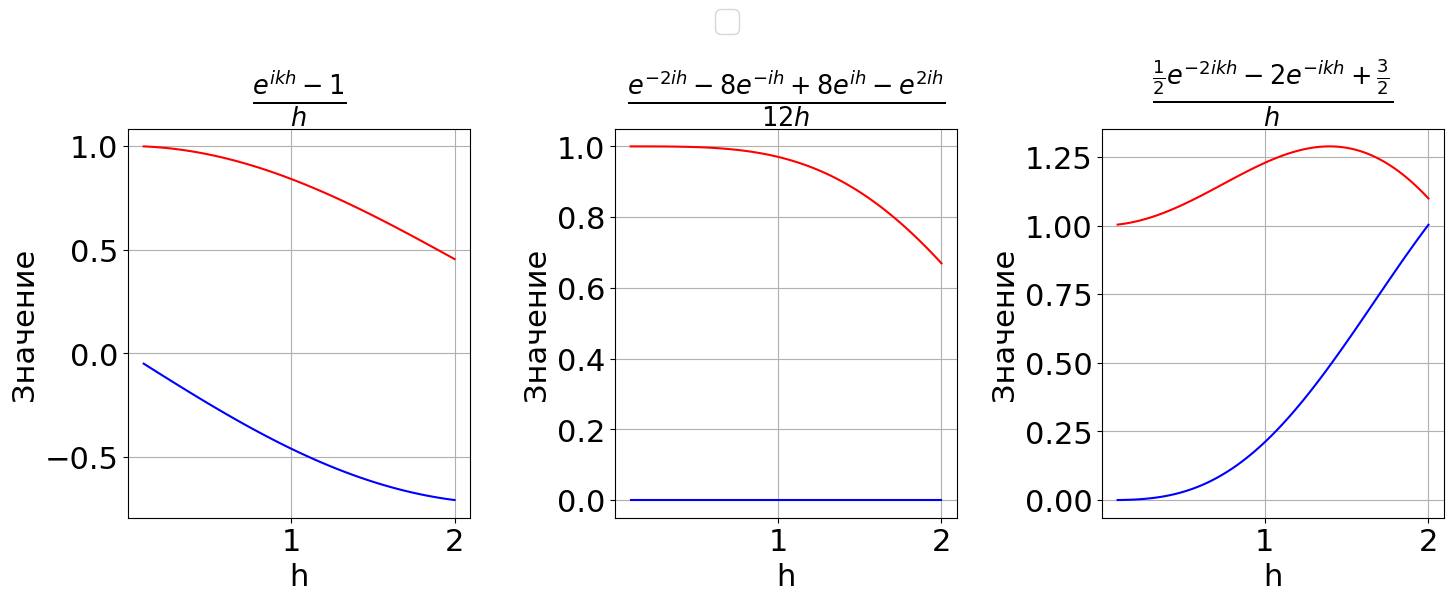

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
k = 1  # Константа k
h_values = np.linspace(0.1, 2.0, 100)  # Значения h

# Формула 1: (e^(ikh) - 1) / h
formula1 = (np.exp(1j * k * h_values) - 1) / h_values

# Формула 2: (e^(-2ih) - 8e^(-ih) + 8e^(ih) - e^(2ih)) / (12h)
formula2 = (np.exp(-2 * 1j * h_values) - 8 * np.exp(-1j * h_values) + 8 * np.exp(1j * h_values) - np.exp(2 * 1j * h_values)) / (12 * h_values)

# Формула 3: (1/2 * e^(-2ikh) - 2 * e^(-ikh) + 3/2) / h
formula3 = (0.5 * np.exp(-2 * 1j * k * h_values) - 2 * np.exp(-1j * k * h_values) + 1.5) / h_values

# Графики
plt.figure(figsize=(15, 6))

# График для формулы 1
plt.subplot(1, 3, 1)
plt.plot(h_values, np.real(formula1), label="Действительная часть", color="blue")
plt.plot(h_values, np.imag(formula1), label="Мнимая часть", color="red")
plt.title(r"$\frac{e^{ikh} - 1}{h}$")
plt.xlabel("h")
plt.ylabel("Значение")
plt.grid()

# График для формулы 2
plt.subplot(1, 3, 2)
plt.plot(h_values, np.real(formula2), color="blue")
plt.plot(h_values, np.imag(formula2), color="red")
plt.title(r"$\frac{e^{-2ih} - 8e^{-ih} + 8e^{ih} - e^{2ih}}{12h}$")
plt.xlabel("h")
plt.ylabel("Значение")
plt.grid()

# График для формулы 3
plt.subplot(1, 3, 3)
plt.plot(h_values, np.real(formula3), color="blue")
plt.plot(h_values, np.imag(formula3), color="red")
plt.title(r"$\frac{\frac{1}{2} e^{-2ikh} - 2 e^{-ikh} + \frac{3}{2}}{h}$")
plt.xlabel("h")
plt.ylabel("Значение")
plt.grid()

# Создаем одну общую легенду
lines, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(lines, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout()
plt.show()

### Упражение 7 (Бонус)
Выведите формулу для первой производной 2-го порядка точности на смещенном шаблоне
\begin{equation}
f'(x_i) = \frac{af(x_{i-2})+bf(x_{i-1})+cf(x_i)}{h}+Ch^2.
\end{equation}

Постройте для этой формулы графики действительной и мнимой части собственных чисел.

\begin{equation}
f'(x_i) = \frac{\frac{1}{2}f(x_{i-2})-2f(x_{i-1})+\frac{3}{2}f(x_i)}{h}+Ch^2.
\end{equation}
